![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pytorch_logo.png/800px-Pytorch_logo.png)

<h2>Introduction</h2>
As we've seen we can use numpy to create single layer neural networks by calculating the gradients by hand and hard coding them and training them via GD. But what if we want to create larger and more complicated networks? What if we want to use complicated and fancy loss functions or use huge datasets and train with more complicated training regimes?! And what about training on GPUs.......<br>
That's a lot to try and work out EVERY time we want to try something new!! Lucky for us there are a number of Deep learning frameworks that can do much of the heavy lifting for us!<br>
For this unit we will be using Pytorch, a hugely powerful and widely used Deep Learning framework that lets us do all of the above and MORE

<h3> Importing the required libraries </h3>
Pytorch has two main modules that we'll be using, torch and torchvision<br>
torch contains most of the Deep Learning functionalities while torchvision contains many computer vision functions designed to work in hand with torch

In [4]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

<h3> The Pytorch Tensor </h3>
As we've already explored the "Tensor" is a useful concept and is very useful in Machine Learning, however you probably noticed in Numpy that our "Tensors" are called "Arrays", but now we are in Pytorch this is no more!!<br>
Let's do a recap of Numpy arrays and how similar they are to Pytorch tensors.

In [5]:
# Create some "Matrices" as lists of lists  

# 3x3
w = [[1, 1, 1],
     [1.5, 1.5, 1.5],
     [2, 2, 2]]

# 3x1
x = [[6], [7], [8]]
# 3x1
b = [[1], [1], [1]]

# Variable to store output
# 3x1
y = [[0], [0], [0]]

As we've seen before

In [6]:
# We can transform our list of lists into a "numpy array" by using the function "array"
w_np = np.array(w)

x_np = np.array(x)

# lets use the function "ones" to create an array of ones!
b_np = np.ones((3, 1))

# Lets now compute Wx + b using these numpy variables!
output = np.matmul(w_np, x_np) + b_np

#print out the result
print("Output:\n", output)
print("Output shape:\n", output.shape)

Output:
 [[22. ]
 [32.5]
 [43. ]]
Output shape:
 (3, 1)


Now in Pytorch!

In [7]:
# We can transform our list of lists into a "torch tensor" by using the function "FloatTensor"
# Note: here we've specified the datatype of the tensor, a 32bit "float" you can also just use the function "tensor"
# But this will inherit the datatype of the array given, to ensure the data-types are the same
# (and we can perform the wanted operations) we use "FloatTensor"

w_torch = torch.FloatTensor(w)

x_torch = torch.FloatTensor(x)

# lets use the function "ones" to create an array of ones!
b_torch = torch.ones(3, 1)

# Lets now compute Wx + b using these numpy variables!
output = torch.matmul(w_torch, x_torch) + b_torch

# print out the result
print("Output:\n", output)
print("Output shape:\n", output.shape)

Output:
 tensor([[22.0000],
        [32.5000],
        [43.0000]])
Output shape:
 torch.Size([3, 1])


Wow! Numpy and Pytorch are remarkably similar, though this is no coincidence! The creators of Pytorch did this intentionally to make it easy to transfer existing skills in Numpy (a Python library that everyone uses - has its origins back in 1995!!) to Pytorch. To aid this transfer there are even functions that can transfer Pytorch tensors to Numpy arrays and back!

In [8]:
# Create a random Numpy array
np_array = np.random.random((3, 4))
print("Numpy array:\n", np_array)

# Convert to Pytorch tensor
torch_tensor = torch.FloatTensor(np_array)
print("Pytorch tensor:\n", torch_tensor)

# Convert back to a Numpy array!
np_array2 = torch_tensor.numpy()
print("Numpy array:\n", np_array2)

Numpy array:
 [[0.91159646 0.75227663 0.47730175 0.30439706]
 [0.77048527 0.11596156 0.50084516 0.27629732]
 [0.99068092 0.88195551 0.66113536 0.70586122]]
Pytorch tensor:
 tensor([[0.9116, 0.7523, 0.4773, 0.3044],
        [0.7705, 0.1160, 0.5008, 0.2763],
        [0.9907, 0.8820, 0.6611, 0.7059]])
Numpy array:
 [[0.9115965  0.75227666 0.47730175 0.30439705]
 [0.7704853  0.11596157 0.50084513 0.27629733]
 [0.99068093 0.8819555  0.6611354  0.7058612 ]]


<h>

<h2>On to Pytorch!</h2>
Let's further explore Pytorch and it's similarities to Numpy and then see what new functionalities it brings to the table!!

<h3> Basic Element-wise Operations </h3>
Let's quickly go back over some basics using Pytorch

In [9]:
# lets create a 2D Tensor using torch.rand
y = torch.rand(4, 5)
# this will create a "Vector" of numbers from 0 to 1
print("Our 1D Tensor:\n",y)

# We can perform normal python scalar arithmetic on Torch tensors
print("\nScalar Multiplication:\n",y * 10)
print("Addition and Square:\n",(y + 1)**2)
print("Addition:\n",y + y)
print("Addition and division:\n",y / (y + 1))

# We can use a combination of Torch functions and normal python arithmetic
print("\nPower and square root:\n",torch.sqrt(y**2))

# Torch tensors are objects and have functions
print("\nY -\n Min:%.2f\n Max:%.2f\n Standard Deviation:%.2f\n Sum:%.2f" %(y.min(), y.max(), y.std(), y.sum()))

Our 1D Tensor:
 tensor([[0.8414, 0.5601, 0.1860, 0.2781, 0.7449],
        [0.0905, 0.7957, 0.3247, 0.5076, 0.9441],
        [0.5865, 0.1242, 0.3195, 0.8260, 0.0554],
        [0.5706, 0.4460, 0.0678, 0.2234, 0.4553]])

Scalar Multiplication:
 tensor([[8.4143, 5.6006, 1.8603, 2.7810, 7.4493],
        [0.9054, 7.9575, 3.2468, 5.0761, 9.4406],
        [5.8651, 1.2422, 3.1954, 8.2604, 0.5543],
        [5.7064, 4.4602, 0.6778, 2.2345, 4.5529]])
Addition and Square:
 tensor([[3.3909, 2.4338, 1.4067, 1.6335, 3.0448],
        [1.1893, 3.2247, 1.7548, 2.2729, 3.7794],
        [2.5170, 1.2639, 1.7412, 3.3344, 1.1139],
        [2.4669, 2.0910, 1.1401, 1.4968, 2.1179]])
Addition:
 tensor([[1.6829, 1.1201, 0.3721, 0.5562, 1.4899],
        [0.1811, 1.5915, 0.6494, 1.0152, 1.8881],
        [1.1730, 0.2484, 0.6391, 1.6521, 0.1109],
        [1.1413, 0.8920, 0.1356, 0.4469, 0.9106]])
Addition and division:
 tensor([[0.4569, 0.3590, 0.1569, 0.2176, 0.4269],
        [0.0830, 0.4431, 0.2451, 0.3367, 0.4856]

<h3>Tensor Opperations</h3>

In [10]:
# Create two 3D Tensors
tensor_1 = torch.rand(3, 3, 3)
tensor_2 = torch.rand(3, 3, 3)

# Add the 2 Tensors
print("Addition:\n",tensor_1 + tensor_2)

# We cannot perform a normal "matrix" multiplication on a 3D tensor
# But we can treat the 3D tensor as a "batch" (like a stack) of 2D tensors
# And perform normal matrix multiplication independantly on each pair of 2D matricies
print("Batch Multiplication:\n" , torch.bmm(tensor_1, tensor_2))

Addition:
 tensor([[[1.7439, 1.1127, 1.0620],
         [1.0603, 0.6237, 1.3436],
         [1.0606, 1.6740, 0.8614]],

        [[1.4261, 0.1520, 1.2360],
         [0.9953, 0.7817, 0.6238],
         [0.7004, 1.0057, 0.4925]],

        [[1.6060, 0.4269, 1.3335],
         [1.1329, 1.3400, 1.0119],
         [0.8166, 0.8965, 1.3495]]])
Batch Multiplication:
 tensor([[[1.6198, 1.5828, 0.6387],
         [1.3750, 1.3256, 0.4877],
         [0.8906, 0.9760, 0.6135]],

        [[0.6053, 0.5594, 0.8036],
         [0.5388, 0.4652, 0.7644],
         [0.3040, 0.4253, 0.3743]],

        [[0.7302, 0.2978, 0.8884],
         [0.7194, 0.4840, 0.7844],
         [1.4800, 1.1156, 1.2665]]])


In [11]:
# lets create a more interesting tensor
tensor_3 = torch.rand(2, 4, 5)
# We can swap the Tensor dimensions
print("\nThe origional Tensor is is:\n", tensor_3)
print("With shape:\n", tensor_3.shape)

# tranpose will swap the dimensions it is given
print("The Re-arranged is:\n", tensor_3.transpose(0, 2))
print("With shape:\n", tensor_3.transpose(0, 2).shape)


The origional Tensor is is:
 tensor([[[0.4445, 0.1160, 0.9413, 0.9715, 0.4861],
         [0.8713, 0.1120, 0.9286, 0.8770, 0.5793],
         [0.1017, 0.8094, 0.0155, 0.1868, 0.2686],
         [0.8066, 0.6160, 0.1853, 0.0491, 0.0296]],

        [[0.1100, 0.1212, 0.3109, 0.1854, 0.4851],
         [0.4882, 0.1951, 0.2760, 0.2962, 0.9124],
         [0.6059, 0.0531, 0.4379, 0.9707, 0.6076],
         [0.0084, 0.5038, 0.5773, 0.8639, 0.1618]]])
With shape:
 torch.Size([2, 4, 5])
The Re-arranged is:
 tensor([[[0.4445, 0.1100],
         [0.8713, 0.4882],
         [0.1017, 0.6059],
         [0.8066, 0.0084]],

        [[0.1160, 0.1212],
         [0.1120, 0.1951],
         [0.8094, 0.0531],
         [0.6160, 0.5038]],

        [[0.9413, 0.3109],
         [0.9286, 0.2760],
         [0.0155, 0.4379],
         [0.1853, 0.5773]],

        [[0.9715, 0.1854],
         [0.8770, 0.2962],
         [0.1868, 0.9707],
         [0.0491, 0.8639]],

        [[0.4861, 0.4851],
         [0.5793, 0.9124],
        

<h3> Indexing </h3>
Indexing in Pytorch works the same as it does in Numpy, see if you can predict what values will be return by the indexing

In [12]:
# Create a 4D Tensor
tensor = torch.rand(2, 3, 1, 4)
print("Our Tensor:\n",tensor)

# Select the last element of dim0
print("\nThe last element of dim0:\n", tensor[-1])

# 1st element of dim0
# 2nd element of dim1
print("\nIndexed elements:\n", tensor[0, 1])

# Select all elements of dim0
# The 2nd element of dim1
# The 1st element of dim2
# The 3rd element of dim3
print("\nIndexed elements:\n", tensor[:, 1, 0, 2])

Our Tensor:
 tensor([[[[0.7248, 0.6792, 0.9633, 0.1924]],

         [[0.9265, 0.2618, 0.0614, 0.9451]],

         [[0.8549, 0.2807, 0.2197, 0.6392]]],


        [[[0.7181, 0.9553, 0.7164, 0.8933]],

         [[0.7355, 0.6610, 0.6002, 0.8120]],

         [[0.6751, 0.4605, 0.6595, 0.2064]]]])

The last element of dim0:
 tensor([[[0.7181, 0.9553, 0.7164, 0.8933]],

        [[0.7355, 0.6610, 0.6002, 0.8120]],

        [[0.6751, 0.4605, 0.6595, 0.2064]]])

Indexed elements:
 tensor([[0.9265, 0.2618, 0.0614, 0.9451]])

Indexed elements:
 tensor([0.0614, 0.6002])


<h3> Describing Tensors </h3> <br>
Lets see how we can view the characteristics of our Tensors

In [13]:
# Lets create a large 4D Tensor
tensor = torch.rand(3, 5, 3, 2)

# View the Number of elements in every dimension
print("The Tensor's shape is:", tensor.shape)

# In Pytorch shape and size() do the same thing!
print("The Tensor's shape using size() is:", tensor.size())

# View the number of elements in total
print("There are %d elements in total:" % tensor.numel())

# View the number of Dimensions
print("There are %d Dimensions" %(tensor.ndim))

The Tensor's shape is: torch.Size([3, 5, 3, 2])
The Tensor's shape using size() is: torch.Size([3, 5, 3, 2])
There are 90 elements in total:
There are 4 Dimensions


<h3> Reshaping </h3> <br>
We can change a Tensor to one of the same size (same number of elements) but a different shape by using functions in a similar fashion to Numpy but with different functions!

In [14]:
# Let us reshape our Tensor to a 2D Tensor
print("Reshape to 3x30:\n", tensor.reshape(3, 30))

# We can also use the Flatten method to convert to a 1D Tensor
print("Flatten to a 1D Tensor:\n",tensor.flatten())

# Here the -1 tells Pytorch to put as many elements as it needs here in order to maintain the given dimention sizes
# AKA "I don't care the size of this dimention as long as the first one is 10"
print("Reshape to 10xwhatever:\n",tensor.reshape(10, -1))

Reshape to 3x30:
 tensor([[0.6407, 0.9918, 0.8489, 0.5226, 0.0117, 0.5032, 0.7491, 0.8495, 0.2616,
         0.7652, 0.1597, 0.8576, 0.6972, 0.7865, 0.8271, 0.2818, 0.1104, 0.1107,
         0.5532, 0.1337, 0.6834, 0.9008, 0.6023, 0.6175, 0.9851, 0.9059, 0.9373,
         0.7469, 0.6046, 0.3110],
        [0.0629, 0.1177, 0.9944, 0.0880, 0.4362, 0.1320, 0.0192, 0.0522, 0.9053,
         0.9256, 0.3446, 0.7100, 0.3922, 0.4353, 0.0303, 0.6544, 0.7609, 0.6496,
         0.2835, 0.9745, 0.6398, 0.2583, 0.1295, 0.3524, 0.6622, 0.1124, 0.5021,
         0.3197, 0.0874, 0.6504],
        [0.2379, 0.6552, 0.3543, 0.8333, 0.8754, 0.0058, 0.3860, 0.3113, 0.3695,
         0.7364, 0.5365, 0.3068, 0.7870, 0.7396, 0.8241, 0.1290, 0.5371, 0.2435,
         0.8733, 0.1061, 0.9212, 0.8781, 0.2167, 0.7095, 0.7079, 0.7637, 0.9356,
         0.8875, 0.4077, 0.9313]])
Flatten to a 1D Tensor:
 tensor([0.6407, 0.9918, 0.8489, 0.5226, 0.0117, 0.5032, 0.7491, 0.8495, 0.2616,
        0.7652, 0.1597, 0.8576, 0.6972, 0.786

<h4>Squeezing and Unsqueezing </h4>
A very common shape-changing operation is to add an "empty" dimension to ensure the shape (specifically the number of dimensions) of the tensor is correct for certain functions. <br>
For example, when we start using Pytorch Neural Network modules, we need to provide the input of the network with a "batch" dimension (we often pass multiple inputs to our network at once) even if we only pass 1 datapoint!

In [15]:
# Lets create a 2D Tensor
tensor = torch.rand(3, 2)

# View the Number of elements in every dimension
print("The Tensors shape is:", tensor.shape)

# unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim3:", tensor.unsqueeze(2).shape)

# unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim2:", tensor.unsqueeze(1).shape)

The Tensors shape is: torch.Size([3, 2])
Add an empty dimenson to dim3: torch.Size([3, 2, 1])
Add an empty dimenson to dim2: torch.Size([3, 1, 2])


In [16]:
# Lets create a 4D Tensor with a few "empty" dimensions
tensor = torch.rand(1, 3, 1, 2)

# View the Number of elements in every dimension
print("The Tensors shape is:", tensor.shape)

# squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim3:", tensor.squeeze(2).shape)

# squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim0:", tensor.squeeze(0).shape)

# If we don't specify a dimension, squeeze will remove ALL empty dimensions
print("Remove all empty dimensons:", tensor.squeeze().shape)

The Tensors shape is: torch.Size([1, 3, 1, 2])
Remove empty dimenson dim3: torch.Size([1, 3, 2])
Remove empty dimenson dim0: torch.Size([3, 1, 2])
Remove all empty dimensons: torch.Size([3, 2])


<h2> Broadcasting </h2>
Broadcasting also works in Pytorch!

In [17]:
# Lets create 2 differently shaped 4D Tensors (Matrices)
tensor1 = torch.rand(1, 4, 3, 1)
tensor2 = torch.rand(3, 4, 1, 4)

print("Tensor 1 shape:\n", tensor1.shape)
print("Tensor 2 shape:\n", tensor2.shape)

tensor3 = tensor1 + tensor2

print("The resulting shape is:\n", tensor3.shape)

Tensor 1 shape:
 torch.Size([1, 4, 3, 1])
Tensor 2 shape:
 torch.Size([3, 4, 1, 4])
The resulting shape is:
 torch.Size([3, 4, 3, 4])


<h2> Creating a basic Classifier </h2>
Lets create some random data and see if we can create a simple linear classifier!

In [18]:
num_data_points = 1000

# Define the mean and covariance for two random data distributions 
class_1_cov = torch.FloatTensor([[1.3, 0.25], [0.25, 1.4]])
class_1_mu = torch.FloatTensor([[1, 2]])
class_1_data = torch.randn(num_data_points, 2)
class_1_data = torch.mm(class_1_data, class_1_cov) + class_1_mu
class_1_data = torch.cat((class_1_data, torch.ones(num_data_points, 1)), 1)

class_2_cov = torch.FloatTensor([[2, -0.5], [-0.5, 1]])
class_2_mu = torch.FloatTensor([[-2, -3]])
class_2_data = torch.randn(num_data_points, 2)
class_2_data = torch.mm(class_2_data, class_2_cov) + class_2_mu
class_2_data = torch.cat((class_2_data, torch.ones(num_data_points, 1)), 1)

# Create some binary labels for each class
class_1_labels = torch.zeros(num_data_points, 1)
class_2_labels = torch.ones(num_data_points, 1)

# Stack all the data and labels together
all_data = torch.cat((class_1_data, class_2_data), 0)
all_labels = torch.cat((class_1_labels, class_2_labels), 0)

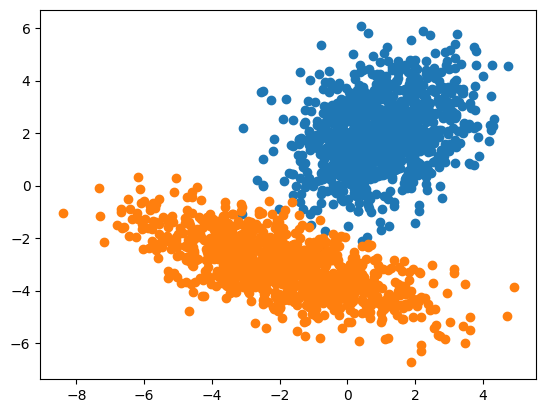

In [19]:
# Lets have a look at the two data distributions, are they going to be linearly separable?
plt.scatter(class_1_data[:, 0], class_1_data[:, 1])
plt.scatter(class_2_data[:, 0], class_2_data[:, 1])

In [20]:
# We can easily solve this linear system
theta = torch.matmul(torch.linalg.pinv(all_data), all_labels)

In [21]:
# Use the calculated parameters (theta) to make a prediction
prediction = (torch.matmul(all_data, theta) >= 0.5).type(torch.long)

In [22]:
# Calculate the accuracy of the predictions
accuracy = (prediction == all_labels).sum()/len(prediction)
print("Classifier Accuracy is %.2f%%" % (100 * accuracy.item()))

Classifier Accuracy is 98.70%
